In [2]:
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys

main_dir='drive/MyDrive/SER/'

data = pd.read_csv(main_dir+'../ravdes/featureEMOVO.csv')

#data = pd.read_csv('../ravdes/featureEMOVO.csv')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,gender,labels
0,-370.303223,58.331867,-7.632109,15.654898,3.273010,0.692397,-8.063744,5.894156,-5.199350,12.546567,...,17.562779,34.036367,-0.028319,0.053574,-0.043633,-0.009186,0.019449,-0.007346,1,1
1,-374.553833,47.796314,1.653561,20.256063,-6.800525,0.783256,-4.250007,7.473405,-15.591282,14.261038,...,19.162629,34.229551,0.023288,0.050375,-0.021473,0.040849,0.002533,0.025532,1,1
2,-386.473145,75.599594,-15.072874,6.823948,-1.835993,-4.165404,-10.107768,7.045069,-17.148949,11.959360,...,19.843059,34.157690,0.013844,0.000709,-0.032024,-0.007825,0.018322,0.016368,1,1
3,-362.502167,89.977379,-15.514508,5.774208,4.361949,12.591103,-0.374380,-0.392911,-4.743288,15.702434,...,19.053175,32.441757,0.002924,0.020344,-0.057423,0.041032,-0.014291,-0.002126,1,1
4,-412.010406,83.760246,-2.188665,18.547068,0.581788,10.956905,3.381726,3.320800,-9.278383,11.129302,...,18.793145,33.286765,0.001819,0.007893,-0.003650,0.014794,0.000603,0.001663,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,-428.723602,127.801125,15.011064,26.158209,-22.814543,10.531158,8.283092,-1.291359,-13.442948,11.084978,...,18.443654,33.880198,-0.017768,0.023105,0.130201,0.076282,-0.008200,-0.029686,2,7
584,-433.270050,98.356888,24.055376,35.478432,-30.932493,11.173256,12.042026,-1.199043,-12.588658,7.034428,...,18.799787,34.613071,-0.027987,-0.025462,-0.003617,0.090180,-0.020973,0.000550,2,7
585,-458.537323,104.085503,15.052121,37.028015,-10.172383,10.071804,2.412206,-3.682174,-7.252892,11.958858,...,18.472471,34.431134,0.087554,0.064611,0.170886,-0.068005,0.058233,-0.019411,2,7
586,-523.336914,88.056267,18.831060,43.098541,-8.197763,15.856596,4.796964,4.109037,-4.488383,12.122023,...,17.343597,33.439551,0.031808,-0.014211,0.000701,-0.059435,0.022520,0.021469,2,7


In [4]:
data.shape

(588, 195)

In [5]:
df=data.loc[data.iloc[:,-2] == 1] #female
#df=data.loc[data.iloc[:,-2] == 2] #male

In [6]:
data.iloc[:,-2] == 1 #female
#data.iloc[:,-2] == 2 #male

,gender
0,True
1,True
2,True
3,True
4,True
...,...
583,False
584,False
585,False
586,False


In [ ]:
X=df.iloc[:,:-2].copy()
y=df.iloc[:,-1].copy()

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-370.303223,58.331867,-7.632109,15.654898,3.273010,0.692397,-8.063744,5.894156,-5.199350,12.546567,...,17.334037,17.539159,17.562779,34.036367,-0.028319,0.053574,-0.043633,-0.009186,0.019449,-0.007346
1,-374.553833,47.796314,1.653561,20.256063,-6.800525,0.783256,-4.250007,7.473405,-15.591282,14.261038,...,16.263369,17.699334,19.162629,34.229551,0.023288,0.050375,-0.021473,0.040849,0.002533,0.025532
2,-386.473145,75.599594,-15.072874,6.823948,-1.835993,-4.165404,-10.107768,7.045069,-17.148949,11.959360,...,18.860587,18.714656,19.843059,34.157690,0.013844,0.000709,-0.032024,-0.007825,0.018322,0.016368
3,-362.502167,89.977379,-15.514508,5.774208,4.361949,12.591103,-0.374380,-0.392911,-4.743288,15.702434,...,15.868680,18.698590,19.053175,32.441757,0.002924,0.020344,-0.057423,0.041032,-0.014291,-0.002126
4,-412.010406,83.760246,-2.188665,18.547068,0.581788,10.956905,3.381726,3.320800,-9.278383,11.129302,...,16.198743,17.339091,18.793145,33.286765,0.001819,0.007893,-0.003650,0.014794,0.000603,0.001663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,-512.075012,81.261253,14.769177,44.970119,1.124721,0.243847,-19.363283,4.484537,-6.476753,8.653331,...,17.096065,16.064563,18.282166,34.448120,-0.011523,0.041373,-0.024520,0.004038,-0.002733,-0.026922
290,-537.805115,74.499825,16.144732,41.413177,0.090658,4.300513,-14.244553,5.471502,-5.960288,9.901382,...,16.241398,15.746897,17.595882,34.392908,-0.003668,0.055127,-0.018462,-0.017223,-0.005943,-0.015435
291,-564.110962,84.495499,19.121347,53.239677,3.447273,9.294318,-18.866158,7.873207,-4.900262,7.340342,...,15.380592,15.405968,17.496630,32.837789,0.042722,0.025001,-0.008568,-0.125956,-0.019678,0.001777
292,-596.333252,73.893417,15.403625,41.073212,1.869733,11.873602,-11.927804,11.471960,-4.937204,11.824884,...,15.167482,15.816087,16.013140,32.617960,-0.010603,-0.008930,-0.032430,-0.074292,-0.006063,-0.013062


In [ ]:
#y=y-1
y

0      1
1      1
2      1
3      1
4      1
      ..
289    7
290    7
291    7
292    7
293    7
Name: labels, Length: 294, dtype: int64

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-370.303223,58.331867,-7.632109,15.654898,3.273010,0.692397,-8.063744,5.894156,-5.199350,12.546567,...,17.334037,17.539159,17.562779,34.036367,-0.028319,0.053574,-0.043633,-0.009186,0.019449,-0.007346
1,-374.553833,47.796314,1.653561,20.256063,-6.800525,0.783256,-4.250007,7.473405,-15.591282,14.261038,...,16.263369,17.699334,19.162629,34.229551,0.023288,0.050375,-0.021473,0.040849,0.002533,0.025532
2,-386.473145,75.599594,-15.072874,6.823948,-1.835993,-4.165404,-10.107768,7.045069,-17.148949,11.959360,...,18.860587,18.714656,19.843059,34.157690,0.013844,0.000709,-0.032024,-0.007825,0.018322,0.016368
3,-362.502167,89.977379,-15.514508,5.774208,4.361949,12.591103,-0.374380,-0.392911,-4.743288,15.702434,...,15.868680,18.698590,19.053175,32.441757,0.002924,0.020344,-0.057423,0.041032,-0.014291,-0.002126
4,-412.010406,83.760246,-2.188665,18.547068,0.581788,10.956905,3.381726,3.320800,-9.278383,11.129302,...,16.198743,17.339091,18.793145,33.286765,0.001819,0.007893,-0.003650,0.014794,0.000603,0.001663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,-512.075012,81.261253,14.769177,44.970119,1.124721,0.243847,-19.363283,4.484537,-6.476753,8.653331,...,17.096065,16.064563,18.282166,34.448120,-0.011523,0.041373,-0.024520,0.004038,-0.002733,-0.026922
290,-537.805115,74.499825,16.144732,41.413177,0.090658,4.300513,-14.244553,5.471502,-5.960288,9.901382,...,16.241398,15.746897,17.595882,34.392908,-0.003668,0.055127,-0.018462,-0.017223,-0.005943,-0.015435
291,-564.110962,84.495499,19.121347,53.239677,3.447273,9.294318,-18.866158,7.873207,-4.900262,7.340342,...,15.380592,15.405968,17.496630,32.837789,0.042722,0.025001,-0.008568,-0.125956,-0.019678,0.001777
292,-596.333252,73.893417,15.403625,41.073212,1.869733,11.873602,-11.927804,11.471960,-4.937204,11.824884,...,15.167482,15.816087,16.013140,32.617960,-0.010603,-0.008930,-0.032430,-0.074292,-0.006063,-0.013062


In [ ]:
X.shape, y

((294, 193),
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 289    7
 290    7
 291    7
 292    7
 293    7
 Name: labels, Length: 294, dtype: int64)

In [ ]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y1 = to_categorical(lb.fit_transform(y))

In [ ]:
y1

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
X.shape, y1.shape

((294, 193), (294, 7))

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-370.303223,58.331867,-7.632109,15.654898,3.273010,0.692397,-8.063744,5.894156,-5.199350,12.546567,...,17.334037,17.539159,17.562779,34.036367,-0.028319,0.053574,-0.043633,-0.009186,0.019449,-0.007346
1,-374.553833,47.796314,1.653561,20.256063,-6.800525,0.783256,-4.250007,7.473405,-15.591282,14.261038,...,16.263369,17.699334,19.162629,34.229551,0.023288,0.050375,-0.021473,0.040849,0.002533,0.025532
2,-386.473145,75.599594,-15.072874,6.823948,-1.835993,-4.165404,-10.107768,7.045069,-17.148949,11.959360,...,18.860587,18.714656,19.843059,34.157690,0.013844,0.000709,-0.032024,-0.007825,0.018322,0.016368
3,-362.502167,89.977379,-15.514508,5.774208,4.361949,12.591103,-0.374380,-0.392911,-4.743288,15.702434,...,15.868680,18.698590,19.053175,32.441757,0.002924,0.020344,-0.057423,0.041032,-0.014291,-0.002126
4,-412.010406,83.760246,-2.188665,18.547068,0.581788,10.956905,3.381726,3.320800,-9.278383,11.129302,...,16.198743,17.339091,18.793145,33.286765,0.001819,0.007893,-0.003650,0.014794,0.000603,0.001663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,-512.075012,81.261253,14.769177,44.970119,1.124721,0.243847,-19.363283,4.484537,-6.476753,8.653331,...,17.096065,16.064563,18.282166,34.448120,-0.011523,0.041373,-0.024520,0.004038,-0.002733,-0.026922
290,-537.805115,74.499825,16.144732,41.413177,0.090658,4.300513,-14.244553,5.471502,-5.960288,9.901382,...,16.241398,15.746897,17.595882,34.392908,-0.003668,0.055127,-0.018462,-0.017223,-0.005943,-0.015435
291,-564.110962,84.495499,19.121347,53.239677,3.447273,9.294318,-18.866158,7.873207,-4.900262,7.340342,...,15.380592,15.405968,17.496630,32.837789,0.042722,0.025001,-0.008568,-0.125956,-0.019678,0.001777
292,-596.333252,73.893417,15.403625,41.073212,1.869733,11.873602,-11.927804,11.471960,-4.937204,11.824884,...,15.167482,15.816087,16.013140,32.617960,-0.010603,-0.008930,-0.032430,-0.074292,-0.006063,-0.013062


In [ ]:
#########fisher score

<AxesSubplot:>

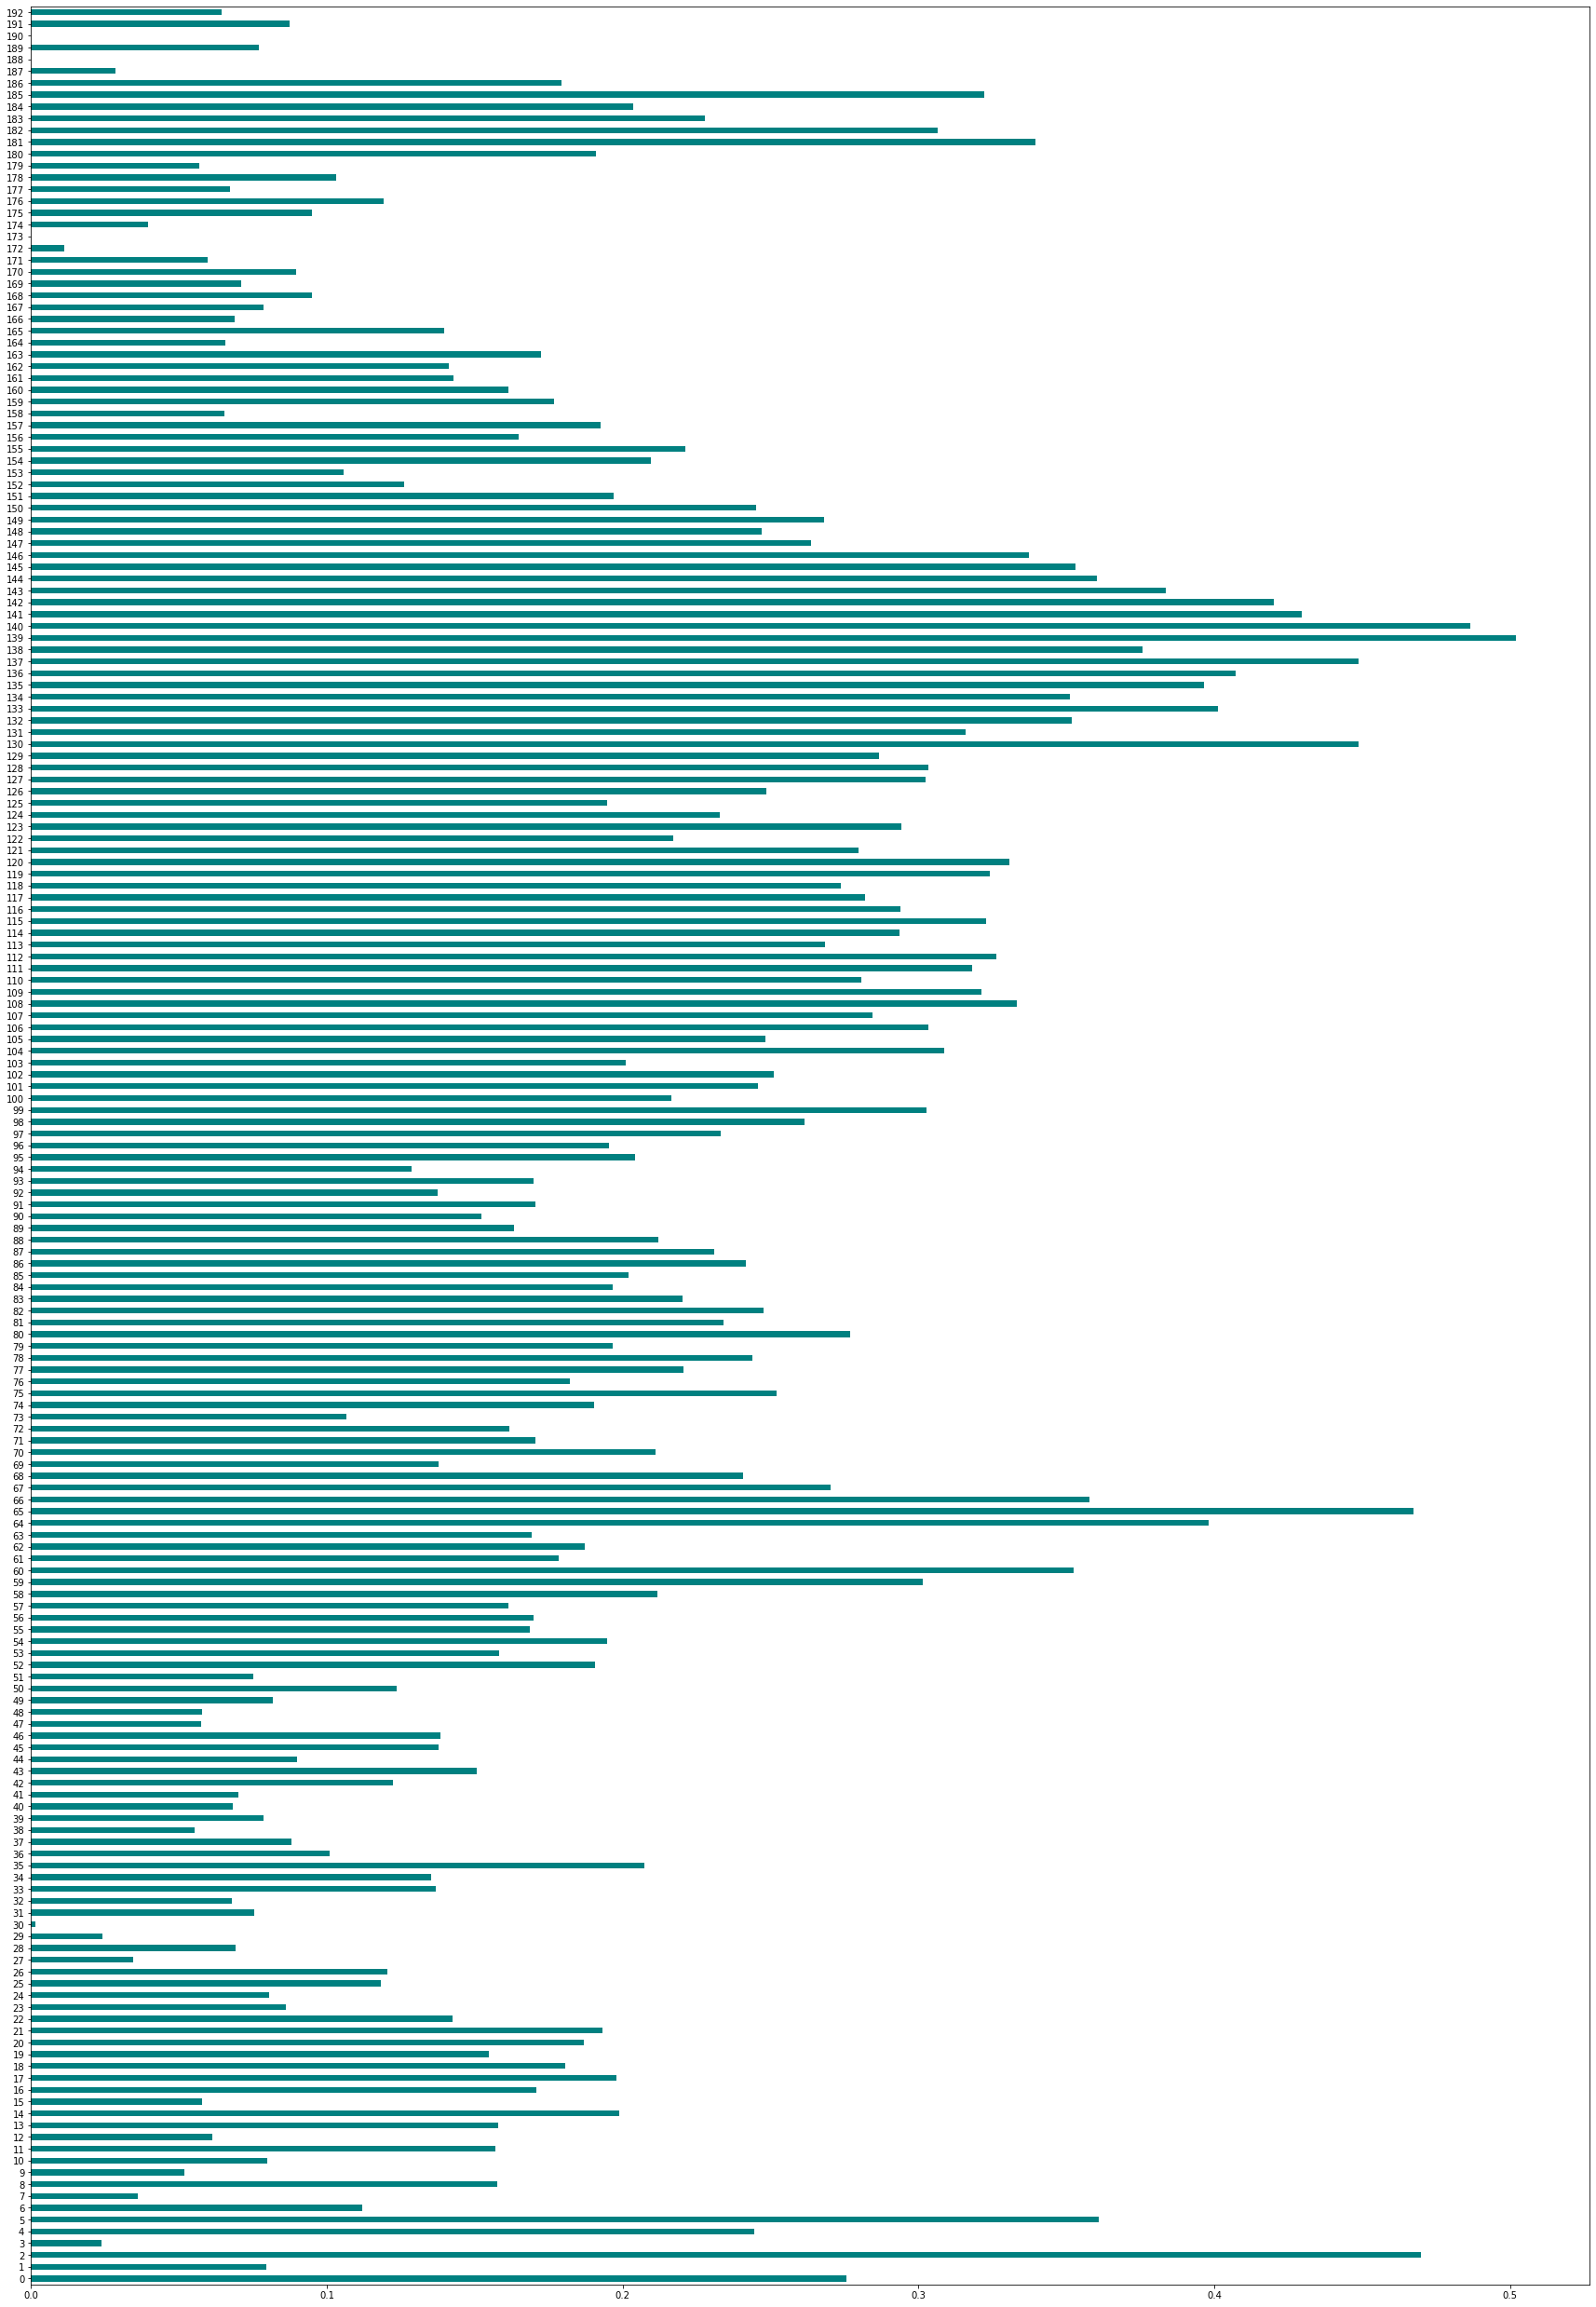

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(X,y)
feat_importance = pd.Series(importance, data.columns[0: len(data.columns)-2])
feat_importance.plot(kind='barh', color='teal', figsize=(30,45))

In [ ]:
feat_importance

0      0.275696
1      0.079575
2      0.469761
3      0.023717
4      0.244377
         ...   
188    0.000000
189    0.077001
190    0.000000
191    0.087463
192    0.064536
Length: 193, dtype: float64

In [ ]:
type(X),type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [ ]:
X2=X.copy().to_numpy()
y2=y.copy().to_numpy()

In [ ]:
from skfeature.function.similarity_based import fisher_score
fisherindex = fisher_score.fisher_score(X2, y2, mode='index')

In [ ]:
num_fea=164
fisherindex[0:num_fea].sort()

In [ ]:
fisherindex[0:num_fea]

array([  0,   1,   2,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  40,  41,
        42,  43,  44,  48,  49,  50,  51,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  77,  78,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  92,  93,  97,  98, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       163, 165, 166, 168, 169, 170, 171, 172, 173, 174, 175, 176, 180,
       181, 182, 183, 184, 185, 186, 187, 190], dtype=int64)

In [ ]:
selected_features = X2[:,fisherindex[0:num_fea]]

In [ ]:
selected_features, len(selected_features), selected_features[2]

(array([[-3.70303223e+02,  5.83318672e+01, -7.63210869e+00, ...,
          3.40363673e+01, -2.83185794e-02, -9.18649396e-03],
        [-3.74553833e+02,  4.77963142e+01,  1.65356076e+00, ...,
          3.42295509e+01,  2.32882292e-02,  4.08493217e-02],
        [-3.86473145e+02,  7.55995941e+01, -1.50728741e+01, ...,
          3.41576903e+01,  1.38442447e-02, -7.82514777e-03],
        ...,
        [-5.64110962e+02,  8.44954987e+01,  1.91213474e+01, ...,
          3.28377886e+01,  4.27215261e-02, -1.25956097e-01],
        [-5.96333252e+02,  7.38934174e+01,  1.54036255e+01, ...,
          3.26179596e+01, -1.06026081e-02, -7.42922572e-02],
        [-6.14704407e+02,  7.77004700e+01,  2.84138336e+01, ...,
          3.28832284e+01, -2.07358673e-02,  1.09965854e-02]]),
 294,
 array([-3.86473145e+02,  7.55995941e+01, -1.50728741e+01, -1.83599293e+00,
        -4.16540384e+00, -1.01077681e+01,  7.04506874e+00, -1.71489487e+01,
         1.19593601e+01, -1.29284296e+01,  3.34855056e+00, -2.04637694e

In [ ]:
X3=pd.DataFrame(selected_features)
X3

,0,1,2,3,4,5,6,7,8,9,...,154,155,156,157,158,159,160,161,162,163
0,-370.303223,58.331867,-7.632109,3.273010,0.692397,-8.063744,5.894156,-5.199350,12.546567,-12.427763,...,0.003104,14.415974,15.089754,18.269887,17.334037,17.539159,17.562779,34.036367,-0.028319,-0.009186
1,-374.553833,47.796314,1.653561,-6.800525,0.783256,-4.250007,7.473405,-15.591282,14.261038,-9.612450,...,0.012358,14.346748,17.036696,16.568013,16.263369,17.699334,19.162629,34.229551,0.023288,0.040849
2,-386.473145,75.599594,-15.072874,-1.835993,-4.165404,-10.107768,7.045069,-17.148949,11.959360,-12.928430,...,0.000658,15.322308,19.266447,20.947689,18.860587,18.714656,19.843059,34.157690,0.013844,-0.007825
3,-362.502167,89.977379,-15.514508,4.361949,12.591103,-0.374380,-0.392911,-4.743288,15.702434,-15.181546,...,0.010091,13.238027,14.423808,16.378944,15.868680,18.698590,19.053175,32.441757,0.002924,0.041032
4,-412.010406,83.760246,-2.188665,0.581788,10.956905,3.381726,3.320800,-9.278383,11.129302,-9.546899,...,0.002966,13.794110,15.933725,16.587892,16.198743,17.339091,18.793145,33.286765,0.001819,0.014794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,-512.075012,81.261253,14.769177,1.124721,0.243847,-19.363283,4.484537,-6.476753,8.653331,-23.700672,...,0.000084,18.159202,15.895847,18.877458,17.096065,16.064563,18.282166,34.448120,-0.011523,0.004038
290,-537.805115,74.499825,16.144732,0.090658,4.300513,-14.244553,5.471502,-5.960288,9.901382,-22.560869,...,0.000073,17.214236,15.149332,17.972702,16.241398,15.746897,17.595882,34.392908,-0.003668,-0.017223
291,-564.110962,84.495499,19.121347,3.447273,9.294318,-18.866158,7.873207,-4.900262,7.340342,-19.601402,...,0.000028,16.418459,12.913818,17.297370,15.380592,15.405968,17.496630,32.837789,0.042722,-0.125956
292,-596.333252,73.893417,15.403625,1.869733,11.873602,-11.927804,11.471960,-4.937204,11.824884,-17.468798,...,0.000126,16.722590,11.980610,14.752116,15.167482,15.816087,16.013140,32.617960,-0.010603,-0.074292


In [ ]:
X.iloc[:,12:21]

,12,13,14,15,16,17,18,19,20
0,-2.170213,4.234774,-5.577742,2.743318,-5.688596,2.181201,-5.164322,-2.079849,-3.885329
1,-5.009347,1.509674,-10.007097,4.140178,-7.520933,0.300318,-0.529421,4.621393,3.165281
2,-2.046377,2.720518,-8.297740,4.585854,-10.210306,0.741422,-4.697660,2.611028,3.070108
3,-4.735877,4.415573,-8.317828,5.494528,-6.348035,8.894180,1.115967,3.652514,3.188199
4,-3.477592,7.870871,-11.462975,1.268862,-5.281945,1.943667,-1.245113,1.090199,-1.372193
...,...,...,...,...,...,...,...,...,...
289,-14.692975,15.821628,-3.403944,-1.920761,-5.533873,2.875550,-5.030684,5.799126,-9.722572
290,-11.821937,15.402183,-3.107312,0.341881,-5.776419,2.994690,-4.340373,5.173290,-8.617463
291,-15.909007,15.368809,-3.135225,-0.557032,-5.364712,3.054584,-7.350572,3.895446,-9.877037
292,-8.795630,12.283203,-4.543345,1.108502,-4.156343,3.802561,-3.403078,3.080723,-6.654487


In [ ]:
############# İkinci fisher, yapma..

In [ ]:
X4

NameError: name 'X4' is not defined

In [ ]:
#########

In [ ]:
### import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Activation
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.utils.data_utils import pad_sequences

from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout#, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import BatchNormalization

def model1(input_shape1):
    model = Sequential()

    model.add(Conv1D(256, 5,padding='same',
                     input_shape=(input_shape1,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))


    model.add(Conv1D(256, 5,padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(BatchNormalization())

    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(256, 5,padding='same',))

    model.add(Activation('relu'))

    model.add(Conv1D(128, 5,padding='same',))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 5,padding='same',))
    model.add(BatchNormalization())

    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    #model.add(Conv1D(128, 5,padding='same',))
    #model.add(Activation('relu'))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    #model.summary()
    return model

In [ ]:
import random, numpy as np
from tensorflow.keras import optimizers
kfold=5
def create_index(kfold, size):
    a = []
    for i in range(size):
        a.append(i)
    random.shuffle(a)
    arr = np.array(a)
    return arr.reshape(kfold, size//kfold)

In [ ]:

hist=[]
scores=[]
totalsize=290 #X3.shape[0]
a=create_index(kfold,totalsize)
for i in range (kfold):
    #print(a[i])

    model_name = 'Femalemodel'+str(i)
    savedir='EMOVOFemale_75/'
    model_path = os.path.join(savedir, (model_name+'.h5'))

    split4=np.concatenate((a[i%kfold],a[(i+1)%kfold],a[(i+2)%kfold],a[(i+3)%kfold]), axis=0)
    split4=np.sort(split4)
    X_train= X3.iloc[split4,:]
    y_train= y1[split4,:]

    split1= np.sort(a[(i+4)%kfold])
    X_test = X3.iloc[split1,:]
    y_test = y1[split1,:]

    x_traincnn =np.expand_dims(X_train, axis=2)
    x_testcnn= np.expand_dims(X_test, axis=2)

    m1= model1(x_traincnn.shape[1])
    opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.00001, decay=1e-6)
    m1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    print(i)
    hist.append(m1.fit(x_traincnn, y_train, batch_size=64, epochs=700, validation_data=(x_testcnn, y_test)))
    scores.append(m1.evaluate(x_testcnn, y_test, verbose=0))


    #outfile = TemporaryFile()
    np.save((savedir+'/X'+str(i)),x_testcnn)
    np.save((savedir+'/y'+str(i)),y_test)

    model_json = m1.to_json()
    with open((savedir+model_name+'.json'), "w") as json_file:
        json_file.write(model_json)
    m1.save(model_path)


0
Epoch 1/700
4/4 [==============================] - 2s 156ms/step - loss: 2.2684 - accuracy: 0.2026 - val_loss: 2.2692 - val_accuracy: 0.1552
Epoch 2/700
4/4 [==============================] - 0s 101ms/step - loss: 2.1043 - accuracy: 0.2284 - val_loss: 2.2227 - val_accuracy: 0.1552
Epoch 3/700
4/4 [==============================] - 0s 104ms/step - loss: 1.9790 - accuracy: 0.2457 - val_loss: 2.1772 - val_accuracy: 0.1552
Epoch 4/700
4/4 [==============================] - 0s 102ms/step - loss: 2.1236 - accuracy: 0.2198 - val_loss: 2.1412 - val_accuracy: 0.1552
Epoch 5/700
4/4 [==============================] - 0s 101ms/step - loss: 2.0019 - accuracy: 0.2284 - val_loss: 2.1142 - val_accuracy: 0.1552
Epoch 6/700
4/4 [==============================] - 0s 100ms/step - loss: 1.9802 - accuracy: 0.2543 - val_loss: 2.0791 - val_accuracy: 0.1552
Epoch 7/700
4/4 [==============================] - 0s 103ms/step - loss: 1.8626 - accuracy: 0.2802 - val_loss: 2.0513 - val_accuracy: 0.1552
Epoch 8/700

In [ ]:
x_testcnn.shape, y_test.shape

((58, 164, 1), (58, 7))

In [ ]:
### scores

In [ ]:
sum=.0
for i in scores:sum+=i[1]

print(sum, sum/len(scores))

3.931034564971924 0.7862069129943847


In [ ]:
scores

[[0.9765010476112366, 0.7413793206214905],
 [0.8564627170562744, 0.8793103694915771],
 [0.924983561038971, 0.7413793206214905],
 [0.8778129816055298, 0.7758620977401733],
 [0.8476023077964783, 0.7931034564971924]]

In [ ]:
### Model yükleme, gereksizse yapma

In [ ]:
# loading json and creating model
from keras.models import model_from_json
savedir='EMOVOFemale_75/'
m='Femalemodel4' # Infact female

json_file = open(savedir+m+'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(savedir+m+'.h5')
print("Loaded model from disk")

Loaded model from disk


In [ ]:
import numpy as np
import tensorflow as tf
opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.00001, decay=1e-6)

Xloaded=np.load(savedir+'/X4.npy')
yloaded=np.load(savedir+'/y4.npy')
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(Xloaded, yloaded, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 79.31%


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

y_pred = loaded_model.predict(Xloaded)
print(y_pred.shape)
yy = []
ya = []
for j in y_pred:
    yy.append(np.argmax(j))
print(len(yy))

##önemli
for j in yloaded:
    ya.append(np.argmax(j))

cm=confusion_matrix(ya, yy)
cm

2/2 [==============================] - 0s 13ms/step
(58, 7)
58


array([[ 6,  0,  1,  0,  0,  1,  0],
       [ 2,  2,  2,  0,  1,  0,  0],
       [ 0,  0,  9,  0,  0,  0,  0],
       [ 1,  0,  0,  4,  0,  0,  0],
       [ 1,  0,  0,  0, 10,  0,  0],
       [ 0,  2,  0,  1,  0,  7,  0],
       [ 0,  0,  0,  0,  0,  0,  8]], dtype=int64)

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = np.array(confusion_matrix(ya, yy) , dtype=float)
for it in range(0, 7):
    sumik = np.sum(array[it])
    for it2 in range(0, 7):
        array[it][it2] = round(array[it][it2] * (100.0/sumik) ,1)
print(array)

[[ 75.    0.   12.5   0.    0.   12.5   0. ]
 [ 28.6  28.6  28.6   0.   14.3   0.    0. ]
 [  0.    0.  100.    0.    0.    0.    0. ]
 [ 20.    0.    0.   80.    0.    0.    0. ]
 [  9.1   0.    0.    0.   90.9   0.    0. ]
 [  0.   20.    0.   10.    0.   70.    0. ]
 [  0.    0.    0.    0.    0.    0.  100. ]]


      dis   gio    neu   pau   rab   sor    tri
dis  75.0   0.0   12.5   0.0   0.0  12.5    0.0
gio  28.6  28.6   28.6   0.0  14.3   0.0    0.0
neu   0.0   0.0  100.0   0.0   0.0   0.0    0.0
pau  20.0   0.0    0.0  80.0   0.0   0.0    0.0
rab   9.1   0.0    0.0   0.0  90.9   0.0    0.0
sor   0.0  20.0    0.0  10.0   0.0  70.0    0.0
tri   0.0   0.0    0.0   0.0   0.0   0.0  100.0



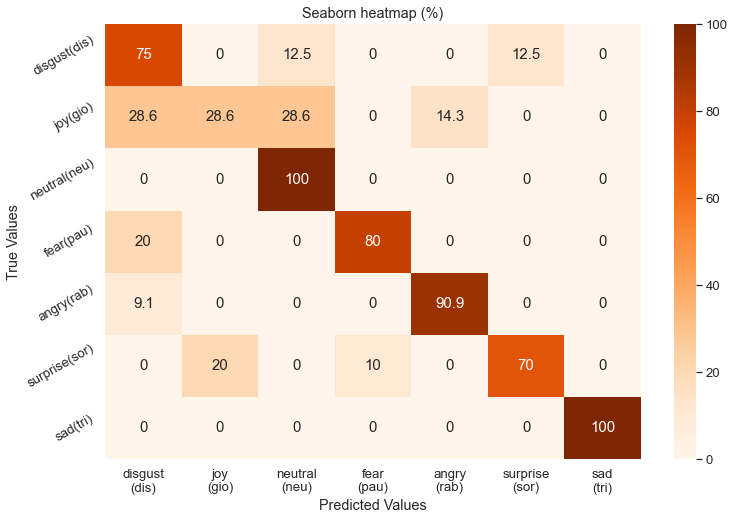

In [ ]:
## EMOVO emotions : ['dis', 'gio', 'neu', 'pau', 'rab', 'sor', 'tri']

#listik = ['dis', 'gio', 'neu', 'pau', 'rab', 'sor', 'tri']

df_cm1 = pd.DataFrame(array, index = [i for i in listik],
                  columns = [i for i in listik])
print(df_cm1)
print()
plt.figure(figsize = (12,8))
plt.title('Seaborn heatmap (%)')
sn.set(font_scale=1.2)
aa=sn.heatmap(df_cm1, annot=True, cmap="Oranges", fmt='g', annot_kws={"size": 15},)
aa.set_xticklabels(['disgust\n(dis)', 'joy\n(gio)', 'neutral\n(neu)','fear\n(pau)', 'angry\n(rab)', 'surprise\n(sor)', 'sad\n(tri)'])
aa.set_yticklabels(['disgust(dis)', 'joy(gio)', 'neutral(neu)','fear(pau)', 'angry(rab)', 'surprise(sor)', 'sad(tri)'],rotation=30)
#aa.set_yticklabels(df_cm1,rotation=30)
aa.set_ylabel('True Values')
aa.set_xlabel('Predicted Values')
plt.savefig('EMOVOFemale_75.png')
plt.show()

In [ ]:
########Bilgi sadece

[[80.    0.   10.   10.    0.    0.    0.    0.  ]
 [10.53 73.68  0.   15.79  0.    0.    0.    0.  ]
 [ 0.    5.26 68.42  5.26  0.   15.79  0.    5.26]
 [ 5.26  0.    5.26 73.68  5.26 10.53  0.    0.  ]
 [ 0.    0.    5.26  0.   68.42  0.   21.05  5.26]
 [ 0.    0.   10.   10.   10.   70.    0.    0.  ]
 [ 5.26  0.    0.    0.    0.    0.   78.95 15.79]
 [ 0.    0.    5.26  0.    0.    0.   21.05 73.68]]
           angry   calm  disgust  fearful  happy  neutral    sad  surprised
angry      80.00   0.00    10.00    10.00   0.00     0.00   0.00       0.00
calm       10.53  73.68     0.00    15.79   0.00     0.00   0.00       0.00
disgust     0.00   5.26    68.42     5.26   0.00    15.79   0.00       5.26
fearful     5.26   0.00     5.26    73.68   5.26    10.53   0.00       0.00
happy       0.00   0.00     5.26     0.00  68.42     0.00  21.05       5.26
neutral     0.00   0.00    10.00    10.00  10.00    70.00   0.00       0.00
sad         5.26   0.00     0.00     0.00   0.00     0.00  

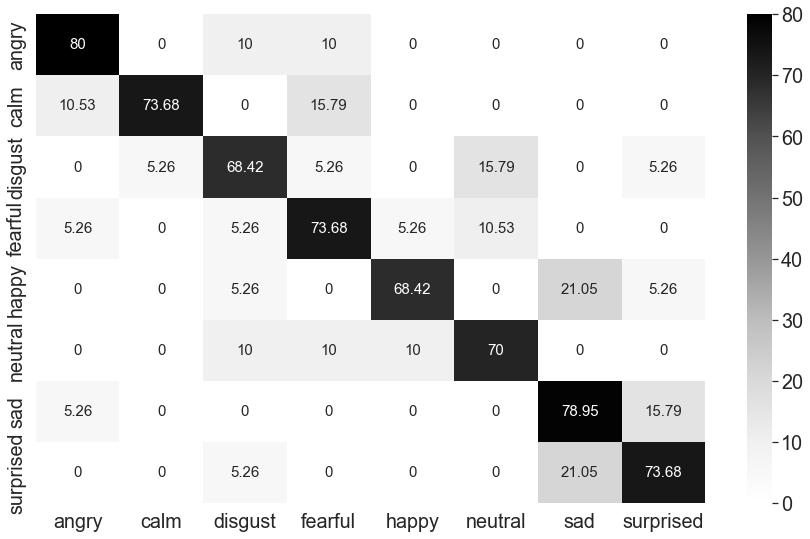

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = np.array(confusion_matrix(ya, yy), dtype=float)
for it in range(0, 8):
    sumik = np.sum(array[it])
    for it2 in range(0, 8):
        array[it][it2] = round(array[it][it2] * (100.0/sumik)*1.0,2)
print(array)
listik = ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
df_cm = pd.DataFrame(array, index = [i for i in listik],
                  columns = [i for i in listik])
print(df_cm)
print()
plt.figure(figsize = (15,9))
sn.set(font_scale=1.8)
sn.heatmap(df_cm, annot=True, cmap="Greys", fmt='g', annot_kws={"size": 15})
plt.show()